<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, SVM, and Random Forest models and return their appropriate accuracy scores</a></li>
</a></li>

<hr>


# Instructions


In this notebook, you will  compare three classification algorithms.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data.

We will use some of the algorithms taught in the course, specifically:

1. Logistic Regression
2. SVM
3. Random Forest

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Recall Score
6.  Precision Score

Finally, you will use your models to generate the report at the end. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, jaccard_score, f1_score, log_loss, precision_score, recall_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset


In [448]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [449]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [450]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [451]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [452]:
df_sydney_processed = df_sydney_processed.astype(float)

In [453]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

In [454]:
features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,19.5,22.4,15.6,6.2,0.0,41.0,17.0,20.0,92.0,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,19.5,25.6,6.0,3.4,2.7,41.0,9.0,13.0,83.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.6,24.5,6.6,2.4,0.1,41.0,17.0,2.0,88.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.2,22.8,18.8,2.2,0.0,41.0,22.0,20.0,83.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.7,25.7,77.4,4.8,0.0,41.0,11.0,6.0,88.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [455]:
Y = Y.astype('int')
Y

0       1
1       1
2       1
3       1
4       1
       ..
3266    0
3267    0
3268    0
3269    0
3270    0
Name: RainTomorrow, Length: 3271, dtype: int64

### Balancing 

This class is typically used in imbalanced classification tasks to address the issue of class imbalance by oversampling the minority class.

In [456]:
ros = RandomOverSampler()

features, Y = ros.fit_resample(features, Y)

In [457]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=.2, random_state=42)

In [458]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3875, 66), (969, 66), (3875,), (969,))

## Training Models

### Logistic Regression


In [459]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

LogisticRegression()

In [460]:
LR_predictions = LR_model.predict(x_test)
LR_predict_proba = LR_model.predict_proba(x_test)

In [461]:
LR_Accuracy_Score = accuracy_score(y_test, LR_predictions)
LR_precision_score = precision_score(y_test, LR_predictions)
LR_recall_score = recall_score(y_test, LR_predictions)
LR_jaccard_score = jaccard_score(y_test, LR_predictions)
LR_F1_Score = f1_score(y_test, LR_predictions)
LR_Log_Loss = log_loss(y_test, LR_predictions)

In [462]:
print(f'Logistic Regression Accuracy: {LR_Accuracy_Score:.2f}')
print(f'Logistic Regression Precision Score: {LR_precision_score:.2f}')
print(f'Logistic Regression F1 Score: {LR_Accuracy_Score:.2f}')
print(f'Logistic Regression Jaccard Index: {LR_Accuracy_Score:.2f}')
print(f'Logistic Regression Log Loss: {LR_Accuracy_Score:.2f}')

Logistic Regression Accuracy: 0.78
Logistic Regression Precision Score: 0.80
Logistic Regression F1 Score: 0.78
Logistic Regression Jaccard Index: 0.78
Logistic Regression Log Loss: 0.78


### SVM


In [463]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [464]:
SVM_predictions = svm_model.predict(x_test)
SVM_predict_proba = svm_model.predict_proba(x_test)

In [465]:
SVM_Accuracy_Score = accuracy_score(y_test, SVM_predictions)
SVM_jaccard_score = jaccard_score(y_test, SVM_predictions)
SVM_F1_Score = f1_score(y_test, SVM_predictions)
SVM_precision_score = precision_score(y_test, SVM_predictions)
SVM_recall_score = recall_score(y_test, SVM_predictions)
SVM_Log_Loss = log_loss(y_test, LR_predictions)


print(f'SVM Accuracy: {SVM_Accuracy_Score:.2f}')
print(f'SVM Jaccard Index: {SVM_JaccardIndex:.2f}')
print(f'SVM F1 Score: {SVM_F1_Score:.2f}')
print(f'SVM precision Score: {SVM_precision_score:.2f}')
print(f'SVM recall Score: {SVM_recall_score:.2f}')
print(f'SVM Log Loss: {SVM_Log_Loss:.2f}')

SVM Accuracy: 0.79
SVM Jaccard Index: 0.68
SVM F1 Score: 0.79
SVM precision Score: 0.80
SVM recall Score: 0.79
SVM Log Loss: 7.81


### Random Forest

In [466]:
RF_model = RandomForestClassifier(n_estimators=100)

In [467]:
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [468]:
RF_predictions = RF_model.predict(x_test)
RF_predict_proba = RF_model.predict_proba(x_test)

In [469]:
RF_accuracy_score = accuracy_score(y_test, RF_predictions)
RF_jaccard_score = jaccard_score(y_test, RF_predictions)
RF_precision_score = precision_score(y_test, RF_predictions)
RF_F1_score = f1_score(y_test, RF_predictions)
RF_recall_score = recall_score(y_test, RF_predictions)
RF_Log_Loss = log_loss(y_test, RF_predictions)


In [470]:
print(f'Random Forest Accuracy: {RF_accuracy_score:.2f}')
print(f'Random Forest Precision Score: {RF_precision_score:.2f}')
print(f'Random Forest F1 Score: {RF_F1_score:.2f}')
print(f'Random Forest recall Score: {RF_recall_score:.2f}')
print(f'Random Forest Jaccard Score: {RF_jaccard_score:.2f}')
print(f'Random Forest Log Loss: {RF_Log_Loss:.2f}')


Random Forest Accuracy: 0.93
Random Forest Precision Score: 0.91
Random Forest F1 Score: 0.94
Random Forest recall Score: 0.97
Random Forest Jaccard Score: 0.88
Random Forest Log Loss: 2.38


## Comparing Models

In [471]:
models = {
    "Random Forest": RF_model,
    "SVM": svm_model,
    "Logistic Regression": LR_model 
}

In [472]:
results = {}

for model_name, model in models.items():
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = accuracy
    results[model_name] = precision
    results[model_name] = recall
    results[model_name] = f1

for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")
    print(f"{model_name}: Precision = {precision:.2f}")
    print(f"{model_name}: recall = {recall:.2f}")
    print(f"{model_name}: F1 Score = {f1:.2f}")

Random Forest: Accuracy = 0.94
Random Forest: Precision = 0.80
Random Forest: recall = 0.75
Random Forest: F1 Score = 0.78
SVM: Accuracy = 0.79
SVM: Precision = 0.80
SVM: recall = 0.75
SVM: F1 Score = 0.78
Logistic Regression: Accuracy = 0.78
Logistic Regression: Precision = 0.80
Logistic Regression: recall = 0.75
Logistic Regression: F1 Score = 0.78


### Ploting Accuracy, Precision, Recall, F1_score

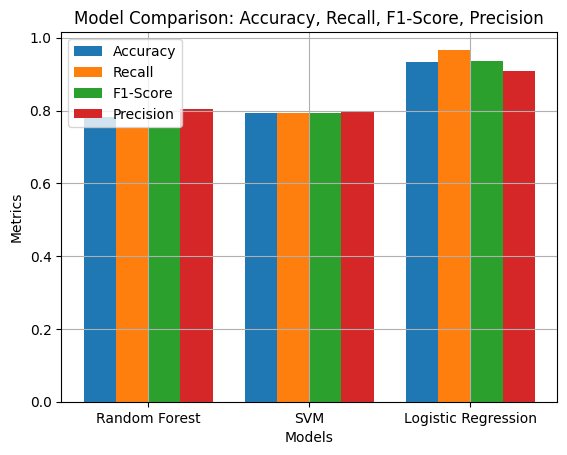

In [473]:

model = ['Logistic Regression', 'SVM', 'Random Forest']
accuracy = [LR_Accuracy_Score, SVM_Accuracy_Score, RF_accuracy_score]
recall = [LR_recall_score, SVM_recall_score, RF_recall_score]
f1_score = [LR_recall_score, SVM_F1_Score, RF_F1_score]
precision = [LR_precision_score, SVM_precision_score, RF_precision_score]

num_models = len(models)
num_metrics = 4

bar_width = 0.2

index = np.arange(num_models)

plt.bar(index, accuracy, bar_width, label='Accuracy', align='center')
plt.bar(index + bar_width, recall, bar_width, label='Recall', align='center')
plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', align='center')
plt.bar(index + 3 * bar_width, precision, bar_width, label='Precision', align='center')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Comparison: Accuracy, Recall, F1-Score, Precision')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()
plt.grid(True)

plt.show()


In [478]:

roc_auc_scores = {}

for model_name, model in models.items():

    y_prob = model.predict_proba(x_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    roc_auc_scores[model_name] = roc_auc

plt.figure()
lw = 2
for model_name, model in models.items():
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'list' object has no attribute 'items'

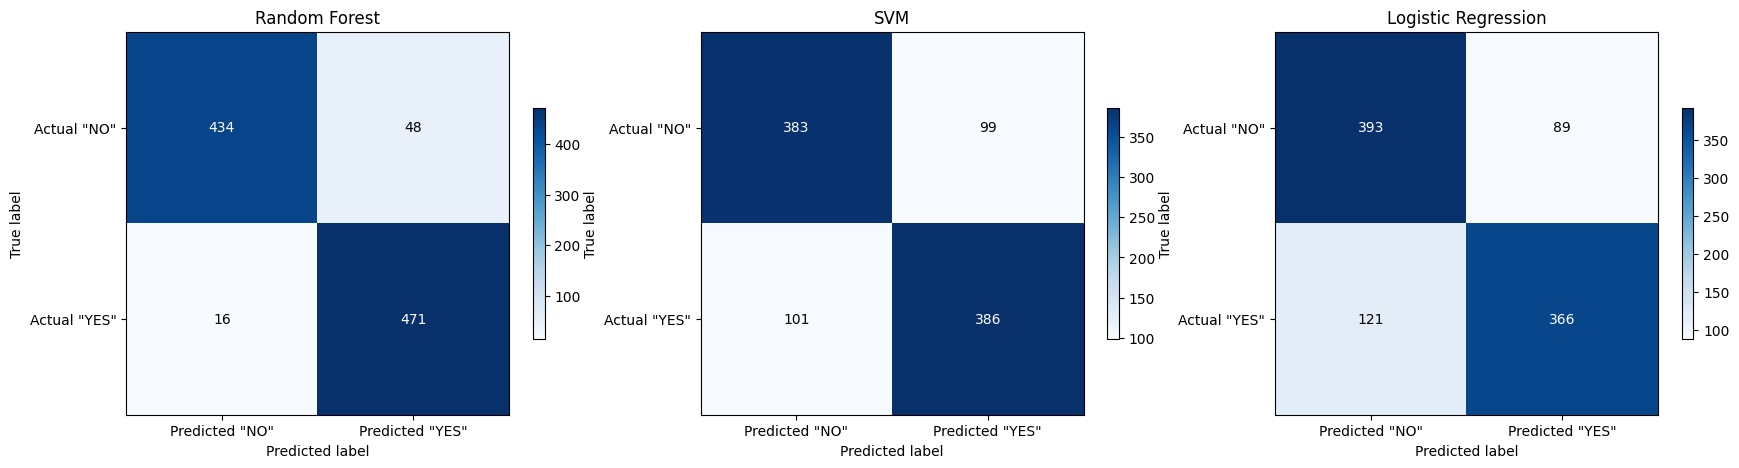

In [475]:
confusion_matrices = {}

for model_name, model in models.items():

    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    confusion_matrices[model_name] = cm

fig, axes = plt.subplots(1, len(models), figsize=(21, 5))

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax, shrink=0.6)
    ax.set(xticks=np.arange(2), yticks=np.arange(2),
           xticklabels=['Predicted "NO"', 'Predicted "YES"'], yticklabels=['Actual "NO"', 'Actual "YES"'],
           title=model_name,
           xlabel='Predicted label',
           ylabel='True label')

    for i in range(2):
        for j in range(2):
            color = "white" if cm[i, j] > cm.max() / 2. else "black"
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color=color)

plt.show()

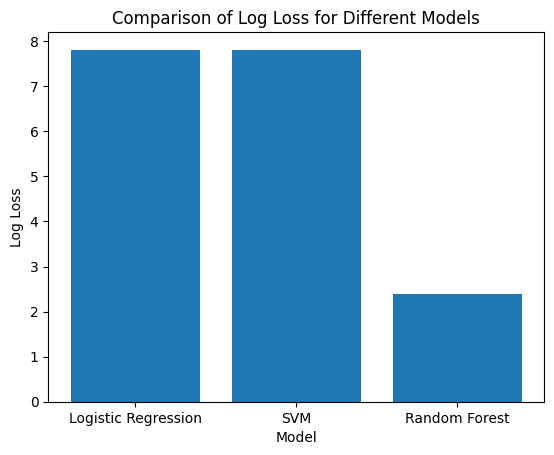

In [476]:
# Log Loss values for each model
log_loss_values = [LR_Log_Loss, SVM_Log_Loss, RF_Log_Loss]
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Plot the Log Loss values
plt.bar(models, log_loss_values)
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Comparison of Log Loss for Different Models')
plt.show()

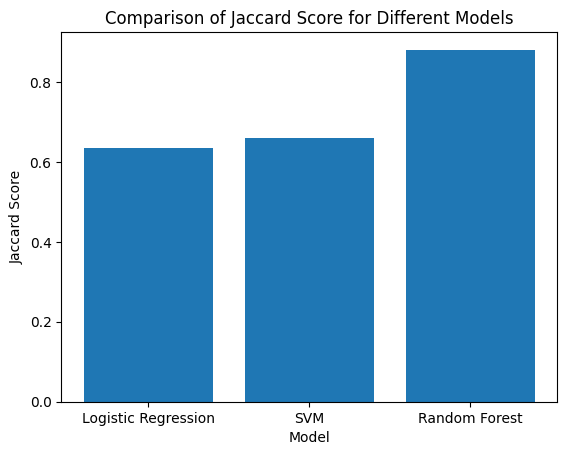

In [477]:
jaccard_scores = [LR_jaccard_score, SVM_jaccard_score, RF_jaccard_score]
models = ['Logistic Regression', 'SVM', 'Random Forest']

# Plot the Jaccard Score values
plt.bar(models, jaccard_scores)
plt.xlabel('Model')
plt.ylabel('Jaccard Score')
plt.title('Comparison of Jaccard Score for Different Models')
plt.show()